In [99]:
import csv

import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Define functions

In [100]:
def split_string_2_anns(string_list):
    anns_list_total = []
    for img_idx,string in enumerate(string_list):
        anns_list_by_img = []
        string_split = string.split(" ")
        for i in range(len(string_split)//6):
            label = string_split[6*i]
            score = string_split[6*i+1]
            xmin = string_split[6*i+2]
            ymin = string_split[6*i+3]
            w = string_split[6*i+4]
            h = string_split[6*i+5]
            ann = [label, score, xmin, ymin, w, h]
            anns_list_by_img.append(ann)
        anns_list_total.append(anns_list_by_img)
    return anns_list_total

def read_image(dataset_path, file_path):
    image = cv2.imread(dataset_path + file_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def plot_annotations(image, anns,score_thr):
    anns_num = 0
    ann_index = []
    
    for i, ann in enumerate(anns):
        score= float(ann[1])        
        
        if score>=score_thr:
            anns_num +=1
            ann_index.append(i)

        else: continue
    
    row = (anns_num+1)//4+1
    fig = plt.figure(figsize=(20,row*4))
    ax = fig.add_subplot(row,4,1)
    ax.imshow(image)
    ax.set_title(f'Number of Anns: {anns_num}')
    
    for j in range(anns_num):
        box_idx = ann_index[j]
        bbox = anns[box_idx]
        label, score, xmin, ymin, w, h = map(float, bbox)
        label = int(label)
        xmin = int(xmin)
        ymin = int(ymin)
        w = int(w)
        h= int(h)
        
        bbox_image = image[ymin:ymin+h,xmin:xmin+w]
        bbox_caption = str(label)

        ax = fig.add_subplot(row,4,j+2)
        ax.imshow(bbox_image)
        ax.set_title(f"Class id: {bbox_caption}, Confidence score: {score:.4f}")        
    
    plt.show()


## Read submisssion

In [108]:
line_counter= 0
data_header = []
string = []
image_loc =[]

with open("submission_json_to_csv.csv","r") as file:
    while 1:
        data = file.readline()
        if not data:
            break
        if line_counter==0:
            data_header= data.split(",")
        else:
            string_ob,image_loc_ob = data.split(",")
            string.append(string_ob)
            image_loc.append(image_loc_ob)
        
        line_counter+=1

anns = split_string_2_anns(string) 

for i, image_loc_ob in enumerate(image_loc):
    image_loc[i] = image_loc_ob.strip('\n')

## Plot submission bboxes

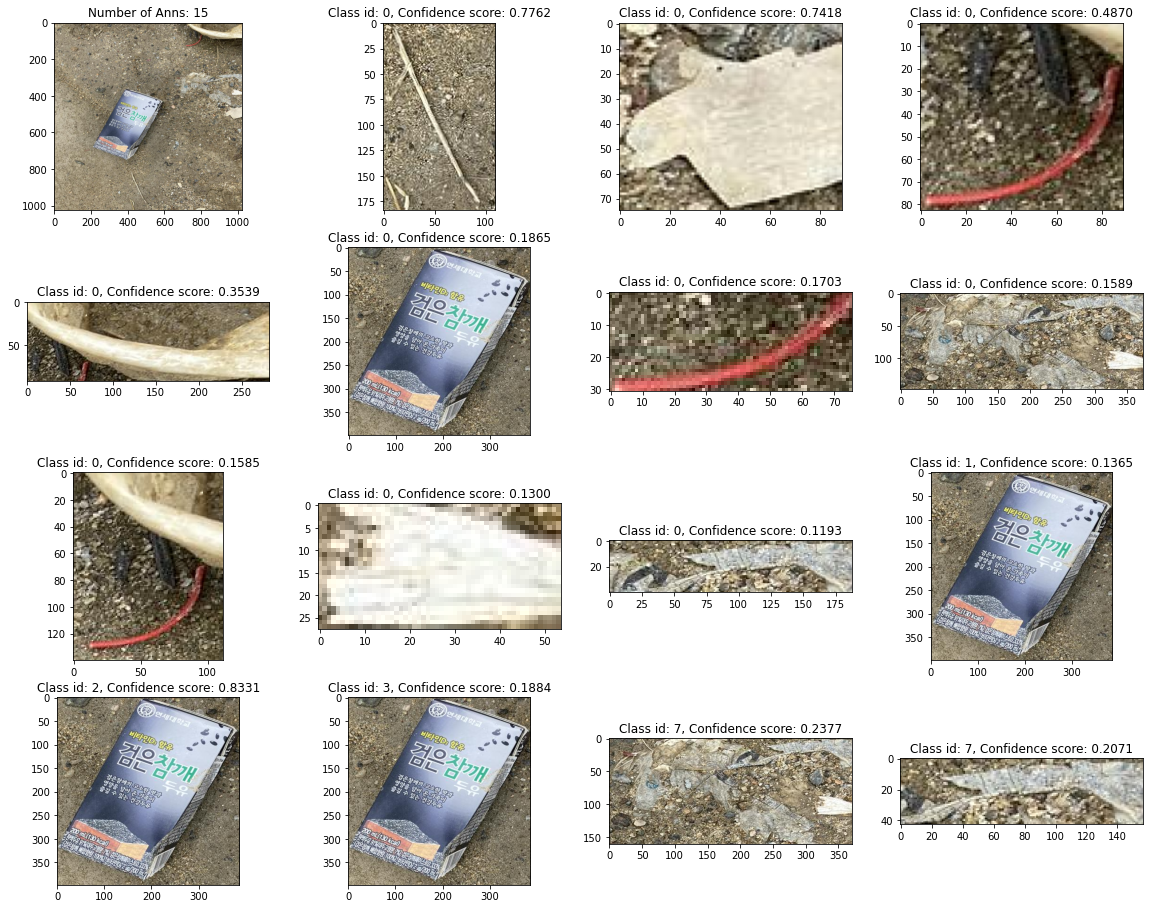

In [110]:
dataset_path = './dataset/'

image_index = 435

file_path = image_loc[image_index]
image = read_image(dataset_path, file_path)

score_threshold = 0.1
plot_annotations(image, anns[image_index],score_threshold)